# Introduction to Machine Learning - Project, part 1

The main objective of this notebook is to create a model from unsupervised learning techniques, on a given data frame, capable of predicting a target variable in said data frame. The target variable in question is called ESR, which is a boolean variable representing the employment status (employed or unemployed) of a person.

## Data exploration

### Import libraries

In [97]:
import os
from pathlib import Path
import math
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Clusteringh - preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Supervised

## Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Random forest
from sklearn.ensemble import RandomForestClassifier

### Visualization
import pydotplus
from sklearn import tree
from IPython.display import Image

## Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report

## Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Cluster evaluation 
from sklearn import metrics

# ROC curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay


from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

import xgboost

### Import data

Here we import the data from the provided file, should be os-agnostic

In [2]:
CodeDirectory = Path(os.path.abspath(''))
DATASET_FOLDER = os.path.join(str(CodeDirectory.parent.absolute()), "_data","")
df = pd.read_csv(DATASET_FOLDER + 'pums.csv')

In [36]:
df.head(10)

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
0,21.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,True
1,19.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,False
2,24.0,12.0,5.0,16.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,1.0,False
3,20.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,NaN,2.0,2.0,True
4,31.0,17.0,5.0,17.0,2.0,0.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,1.0,True
5,27.0,18.0,5.0,16.0,2.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,1.0,False
6,80.0,14.0,5.0,16.0,1.0,0.0,1.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,False
7,39.0,21.0,1.0,NaN,1.0,0.0,1.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,1.0,False
8,92.0,17.0,1.0,16.0,1.0,0.0,1.0,1.0,2.0,4.0,1.0,2.0,2.0,1.0,1.0,False
9,92.0,22.0,5.0,17.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,False


Check for data types, missing values and statistical distribution

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746336 entries, 0 to 746335
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEP      746336 non-null  float64
 1   SCHL      727454 non-null  object 
 2   MAR       746336 non-null  float64
 3   RELP      727972 non-null  object 
 4   DIS       746336 non-null  float64
 5   ESP       746336 non-null  float64
 6   CIT       727657 non-null  object 
 7   MIG       746336 non-null  float64
 8   MIL       746336 non-null  float64
 9   ANC       746336 non-null  float64
 10  NATIVITY  727738 non-null  object 
 11  DEAR      727608 non-null  object 
 12  DEYE      727917 non-null  object 
 13  DREM      746336 non-null  float64
 14  SEX       746336 non-null  float64
 15  ESR       746336 non-null  bool   
dtypes: bool(1), float64(9), object(6)
memory usage: 86.1+ MB


In [5]:
df.describe()

,AGEP,MAR,DIS,ESP,MIG,MIL,ANC,DREM,SEX
count,746336.000000,746336.000000,746336.000000,746336.000000,746336.000000,746336.000000,746336.000000,746336.000000,746336.000000
mean,40.378314,2.995578,1.866040,0.617611,1.247413,3.080612,1.757976,1.844122,1.507907
std,23.374484,1.865125,0.340609,1.678300,0.675038,1.608065,1.097682,0.485527,0.499938
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,20.000000,1.000000,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000
50%,40.000000,3.000000,2.000000,0.000000,1.000000,4.000000,1.000000,2.000000,2.000000
75%,59.000000,5.000000,2.000000,0.000000,1.000000,4.000000,2.000000,2.000000,2.000000
max,94.000000,5.000000,2.000000,8.000000,3.000000,4.000000,4.000000,2.000000,2.000000


### Understand variables

In [6]:
print("Distinct Values in RELP: \t", df.RELP.unique())

Distinct Values in RELP: 	 ['17.0' '16.0' nan 'notknown' '0.0' '1.0' '2.0' '5.0' '13.0' '15.0' '6.0'
 '9.0' '7.0' '10.0' '4.0' '11.0' '12.0' '14.0' '8.0' '3.0']


Rename data frame columns for better readability, we basically need to define a dictionary. An explanation for each variable is found in the pdf file in the data folder.
Looks like RELP is an outdated variable, replaced by RELSHIPP in latest dataset. Looking at older datasets on https://data.census.gov/mdat/, we found a match in the 2014 dataset, see screenshot in data folder for details.

In [3]:
df_oldcolumns = df
column_dictionary = {"AGEP": "Age", "SCHL":"Education", "MAR": "MaritalStatus", "DIS":"DisabilityStatus", "ESP":"ParentsEmploymentStatus", "MIG":"MigrationStatus", "MIL":"MilitaryService", "RELP":"Relationship", "CIT":"CitizenshipStatus", "ANC":"AncestryRecode", "NATIVITY":"Nativity", "DEYE":"VisionDifficulties", "DEAR":"HearingDifficulties", "DREM":"CognitiveDifficulties", "SEX":"LegalGender", "ESR":"EmploymentStatusRecode"}
df = df.rename(columns=column_dictionary)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746336 entries, 0 to 746335
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      746336 non-null  float64
 1   Education                727454 non-null  object 
 2   MaritalStatus            746336 non-null  float64
 3   Relationship             727972 non-null  object 
 4   DisabilityStatus         746336 non-null  float64
 5   ParentsEmploymentStatus  746336 non-null  float64
 6   CitizenshipStatus        727657 non-null  object 
 7   MigrationStatus          746336 non-null  float64
 8   MilitaryService          746336 non-null  float64
 9   AncestryRecode           746336 non-null  float64
 10  Nativity                 727738 non-null  object 
 11  HearingDifficulties      727608 non-null  object 
 12  VisionDifficulties       727917 non-null  object 
 13  CognitiveDifficulties    746336 non-null  float64
 14  Lega

In [6]:
column_dictionary

{'AGEP': 'Age',
 'SCHL': 'Education',
 'MAR': 'MaritalStatus',
 'DIS': 'DisabilityStatus',
 'ESP': 'ParentsEmploymentStatus',
 'MIG': 'MigrationStatus',
 'MIL': 'MilitaryService',
 'RELP': 'Relationship',
 'CIT': 'CitizenshipStatus',
 'ANC': 'AncestryRecode',
 'NATIVITY': 'Nativity',
 'DEYE': 'VisionDifficulties',
 'DEAR': 'HearingDifficulties',
 'DREM': 'CognitiveDifficulties',
 'SEX': 'LegalGender',
 'ESR': 'EmploymentStatusRecode'}

In [4]:
df.describe()

,Age,MaritalStatus,DisabilityStatus,ParentsEmploymentStatus,MigrationStatus,MilitaryService,AncestryRecode,CognitiveDifficulties,LegalGender
count,746336.000000,746336.000000,746336.000000,746336.000000,746336.000000,746336.000000,746336.000000,746336.000000,746336.000000
mean,40.378314,2.995578,1.866040,0.617611,1.247413,3.080612,1.757976,1.844122,1.507907
std,23.374484,1.865125,0.340609,1.678300,0.675038,1.608065,1.097682,0.485527,0.499938
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,20.000000,1.000000,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000
50%,40.000000,3.000000,2.000000,0.000000,1.000000,4.000000,1.000000,2.000000,2.000000
75%,59.000000,5.000000,2.000000,0.000000,1.000000,4.000000,2.000000,2.000000,2.000000
max,94.000000,5.000000,2.000000,8.000000,3.000000,4.000000,4.000000,2.000000,2.000000


### Check for duplicates

In [4]:
df.duplicated().sum()

380533

In [4]:
df = df.drop_duplicates()

### Missing values

In what follows, variables that present missing values will be analized and those missing values will be accordingly managed.

In [7]:
df.isnull().sum()

Age                            0
Education                  13015
MaritalStatus                  0
Relationship               14701
DisabilityStatus               0
ParentsEmploymentStatus        0
CitizenshipStatus          15929
MigrationStatus                0
MilitaryService                0
AncestryRecode                 0
Nativity                   16065
HearingDifficulties        16144
VisionDifficulties         15922
CognitiveDifficulties          0
LegalGender                    0
EmploymentStatusRecode         0
dtype: int64

#### Education

The educational attainment is listed as NA if the person is less than 3 years old. However, there are other missing values relative to older people. We will check the education distribution for the available data points and consider whether to discard missing values or substitute them with a reasonable value, eg mean or median of education

In [5]:
df[df['Age']>3].isnull().sum()

Age                            0
Education                  18067
MaritalStatus                  0
Relationship               17626
DisabilityStatus               0
ParentsEmploymentStatus        0
CitizenshipStatus          17911
MigrationStatus                0
MilitaryService                0
AncestryRecode                 0
Nativity                   17789
HearingDifficulties        17975
VisionDifficulties         17653
CognitiveDifficulties          0
LegalGender                    0
EmploymentStatusRecode         0
dtype: int64

In [5]:
df['Education'] = pd.to_numeric(df['Education'], errors='coerce')

Simply replacing missing values with eg the median might incur in strange results, like a 3 year old having a high school degree. We can create a new variable called AgeCategory which basically bins the Age variable, then we can replace the missing values with the median relative to AgeCategory. We can also group by ParentsEmploymentStatus, as (higher) education, particularly in the US, is mostly a privilege reserved for higher income families.

In [6]:
df['AgeCategory'] = np.floor(df['Age']/10)

In [10]:
df[['Education','AgeCategory','ParentsEmploymentStatus']].corr()

,Education,AgeCategory,ParentsEmploymentStatus
Education,1.000000,0.318786,-0.451761
AgeCategory,0.318786,1.000000,-0.453716
ParentsEmploymentStatus,-0.451761,-0.453716,1.000000


/tmp/ipykernel_28873/996122946.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["AgeCategory"]==0.0][df['ParentsEmploymentStatus']==1.0].Education.hist()


<Axes: >

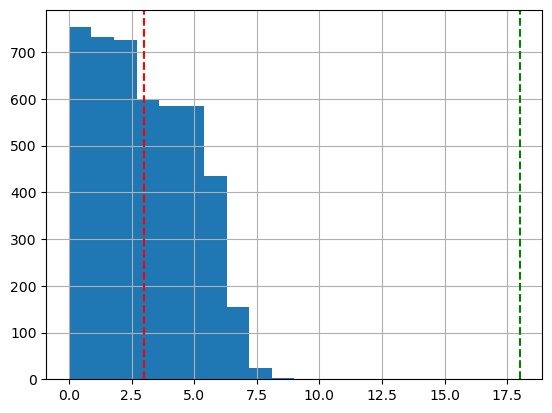

In [7]:
plt.axvline(x=df.Education.median(),color='green',linestyle='--')
plt.axvline(x=df[df["AgeCategory"]==0.0].Education.median(),color='red',linestyle='--')
df[df["AgeCategory"]==0.0][df['ParentsEmploymentStatus']==1.0].Education.hist()

Below, rhs returns an array which we assign to the Education column of the original data frame (direct assignment without calling values is not possible as the shapes are different)

In [8]:
df['Education'] = df.groupby(['AgeCategory', 'ParentsEmploymentStatus'])['Education'].apply(lambda x: x.fillna(x.median())).values

In [14]:
df.isnull().sum()

Age                            0
Education                      0
MaritalStatus                  0
Relationship               14701
DisabilityStatus               0
ParentsEmploymentStatus        0
CitizenshipStatus          15929
MigrationStatus                0
MilitaryService                0
AncestryRecode                 0
Nativity                   16065
HearingDifficulties        16144
VisionDifficulties         15922
CognitiveDifficulties          0
LegalGender                    0
EmploymentStatusRecode         0
AgeCategory                    0
dtype: int64

The variable age category is no longer needed, we can drop it

In [9]:
df = df.drop(columns=['AgeCategory'])

#### Relationship

We can probably discard this variable

In [10]:
df = df.drop(columns=['Relationship'])

In [90]:
df.isnull().sum()

Age                            0
Education                      0
MaritalStatus                  0
DisabilityStatus               0
ParentsEmploymentStatus        0
CitizenshipStatus           1862
MigrationStatus                0
MilitaryService                0
AncestryRecode                 0
Nativity                    1862
HearingDifficulties        37362
VisionDifficulties         37069
CognitiveDifficulties          0
LegalGender                    0
EmploymentStatusRecode         0
AgeCategory                    0
dtype: int64

In [ ]:
df['Relationship'] = pd.to_numeric(df['Relationship'], errors='coerce')

<Axes: >

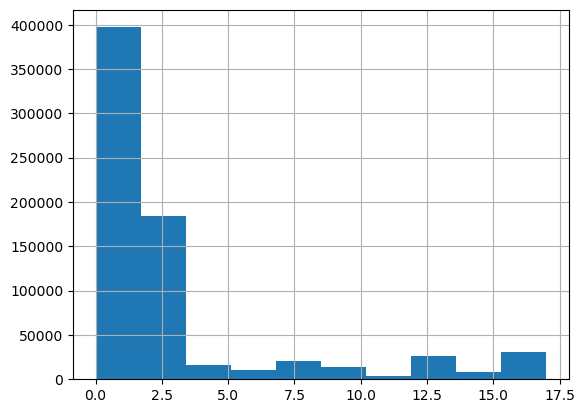

In [22]:
df[df['Relationship'].isnull()==0]['Relationship'].hist()

Here, replacing the missing values with the mode seems reasonable

#### Citizenship status and nativity

In [13]:
df['CitizenshipStatus'] = pd.to_numeric(df['CitizenshipStatus'], errors='coerce')
df['Nativity'] = pd.to_numeric(df['Nativity'], errors='coerce')

In [18]:
df[['CitizenshipStatus','Nativity','AncestryRecode','MilitaryService','MigrationStatus']].corr()

,CitizenshipStatus,Nativity,AncestryRecode,MilitaryService,MigrationStatus
CitizenshipStatus,1.000000,0.967220,-0.161426,0.169876,-0.045082
Nativity,0.967220,1.000000,-0.163949,0.181946,-0.050535
AncestryRecode,-0.161426,-0.163949,1.000000,-0.063207,0.016037
MilitaryService,0.169876,0.181946,-0.063207,1.000000,-0.008288
MigrationStatus,-0.045082,-0.050535,0.016037,-0.008288,1.000000


In [12]:
# Function to fill missing CitizenshipStatus with mode based on Nativity
def fill_missing_citizenship_status(df):
    # Create a dictionary to store the mode of CitizenshipStatus for each Nativity
    mode_dict = df.groupby('Nativity')['CitizenshipStatus'].agg(lambda x: stats.mode(x.dropna())[0]).to_dict()
    
    # Define a function to fill missing values using the mode dictionary
    def fill_mode(row):
        if pd.isnull(row['CitizenshipStatus']):
            return mode_dict.get(row['Nativity'], row['CitizenshipStatus']) # Second entry needed if row['Nativity'] is not in dict, in this case if row['Nativity']=NA
        else:
            return row['CitizenshipStatus']
    
    # Apply the function to fill missing values
    df['CitizenshipStatus'] = df.apply(fill_mode, axis=1).values
    
    return df

In [14]:
# Function to fill missing Nativity with mode based on CitizenshipStatus
def fill_missing_nativity(df):
    # Create a dictionary to store the mode of Nativity for each CitizenshipStatus
    mode_dict = df.groupby('CitizenshipStatus')['Nativity'].agg(lambda x: stats.mode(x.dropna())[0]).to_dict()
    
    # Define a function to fill missing values using the mode dictionary
    def fill_mode(row):
        if pd.isnull(row['Nativity']):
            return mode_dict.get(row['CitizenshipStatus'], row['Nativity'])
        else:
            return row['Nativity']
    
    # Apply the function to fill missing values
    df['Nativity'] = df.apply(fill_mode, axis=1).values
    
    return df

In [15]:
df.groupby('Nativity')['CitizenshipStatus'].agg(lambda x: stats.mode(x.dropna())[0]).to_dict()

{1.0: 1.0, 2.0: 4.0}

In [16]:
df = fill_missing_citizenship_status(df)
df = fill_missing_nativity(df)

In [17]:
df.loc[df.Nativity.isnull()==1]['Nativity'].isnull().sum()

0

In [17]:
df = df.dropna(subset=['CitizenshipStatus'])

##### PCA

Normalize data

In [28]:
df_normalized=(df[['Nativity','CitizenshipStatus']] - df[['Nativity','CitizenshipStatus']].mean()) / df[['Nativity','CitizenshipStatus']].std()

In [31]:
pca = PCA(n_components=df[['Nativity','CitizenshipStatus']].shape[1])

In [32]:
pca.fit(df_normalized)

PCA(n_components=2)

Result visualization

                        PC0       PC1
Nativity           0.707107 -0.707107
CitizenshipStatus  0.707107  0.707107


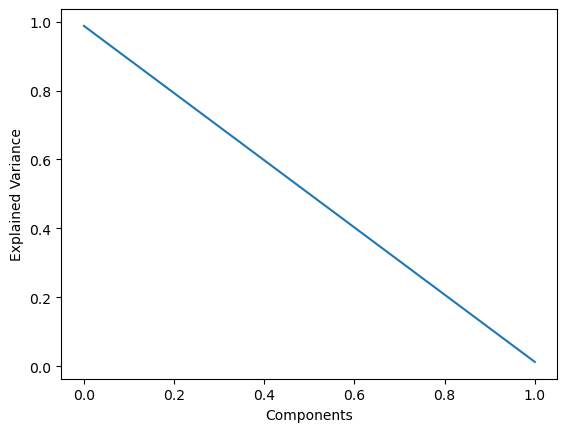

In [35]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC%s' % _ for _ in range(len(df_normalized.columns))], index=df[['Nativity','CitizenshipStatus']].columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

#### Hearing and Vision difficulties

In [18]:
df['HearingDifficulties'] = pd.to_numeric(df['HearingDifficulties'], errors='coerce')
df['VisionDifficulties'] = pd.to_numeric(df['VisionDifficulties'], errors='coerce')

In [26]:
df[['HearingDifficulties','VisionDifficulties','DisabilityStatus']].corr()

,HearingDifficulties,VisionDifficulties,DisabilityStatus
HearingDifficulties,1.000000,0.215141,0.493860
VisionDifficulties,0.215141,1.000000,0.406246
DisabilityStatus,0.493860,0.406246,1.000000


We might be able to say something about hearing and vision difficulties from the disability status variable. If entry does not have disability, then both HearingDifficulties and VisionDifficulties are not present (==2.0)

<Axes: >

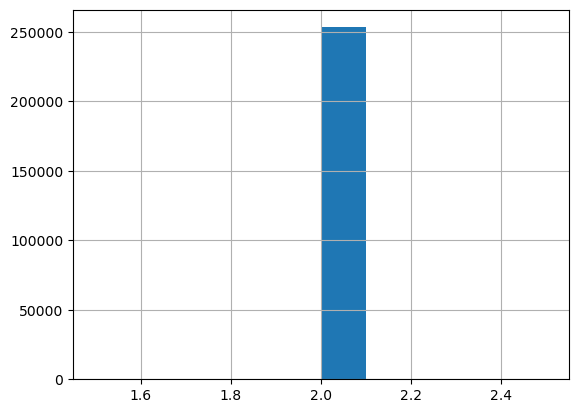

In [29]:
df[df["DisabilityStatus"]==2.0].HearingDifficulties.hist()

<Axes: >

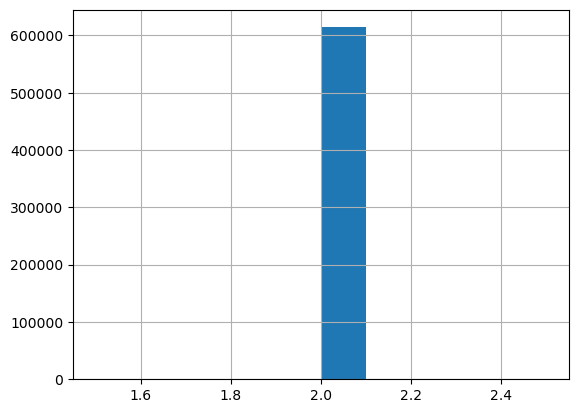

In [73]:
df[df["DisabilityStatus"]==2.0].VisionDifficulties.hist()

If entry does have disability, the distributions are a bit more complicated

<Axes: >

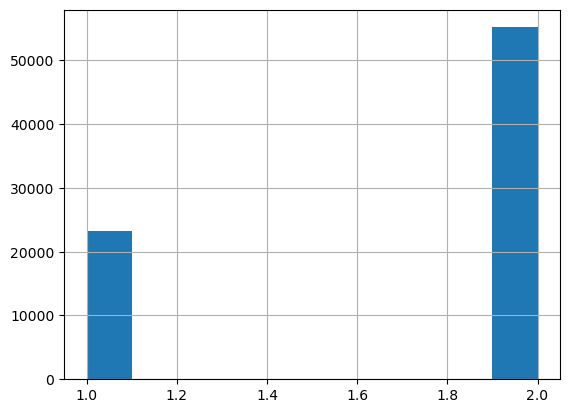

In [30]:
df[df["DisabilityStatus"]==1.0].HearingDifficulties.hist()

<Axes: >

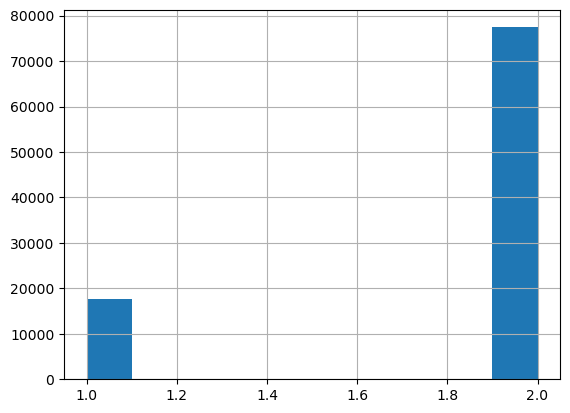

In [76]:
df[df["DisabilityStatus"]==1.0].VisionDifficulties.hist()

Filling NA data with mean or median is out of the question (boolean values for Hearing and Vision diff), and using the mode would skew the distribution. We can however sample from the available data in order to maintain the distribution intact

In [19]:
# Function to fill missing CitizenshipStatus with mode based on Nativity
def fill_missing_difficulties(df, col):
    # Define a function to fill missing values using the mode dictionary
    def fill_notavailable(row):
        if pd.isnull(row[col]):
            if row['DisabilityStatus'] == 2.0:
                return 2.0
            else:
                sample = df[df['DisabilityStatus']==1.0][col].sample(ignore_index=True)
                if sample.isnull()[0]:
                    return fill_notavailable(row) 
                else:
                    return sample[0]
        else:
            return row[col]
    
    # Apply the function to fill missing values
    df[col] = df.apply(fill_notavailable, axis=1).values
    
    return df

In [20]:
df = fill_missing_difficulties(df, 'VisionDifficulties')
df = fill_missing_difficulties(df, 'HearingDifficulties')

<Axes: >

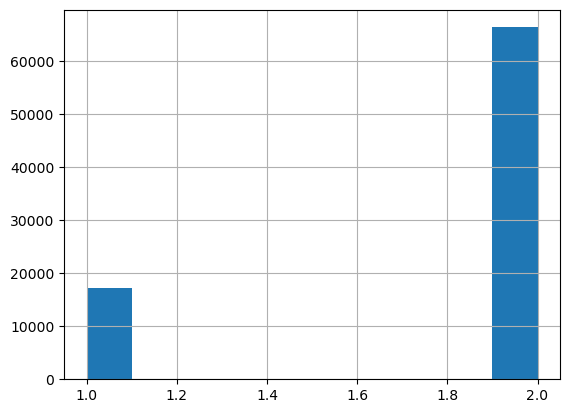

In [33]:
df[df["DisabilityStatus"]==1.0].VisionDifficulties.hist()

<Axes: >

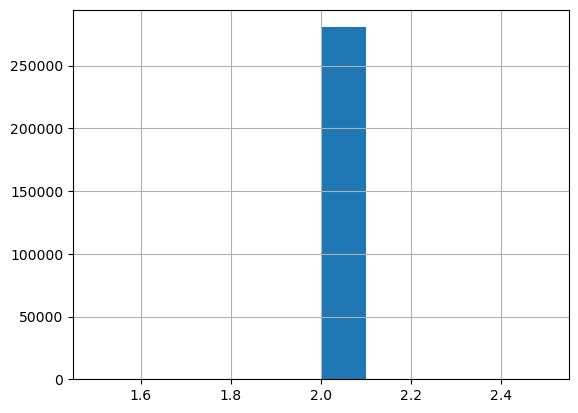

In [24]:
df[df["DisabilityStatus"]==2.0].HearingDifficulties.hist()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363956 entries, 0 to 746335
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      363956 non-null  float64
 1   Education                363956 non-null  float64
 2   MaritalStatus            363956 non-null  float64
 3   DisabilityStatus         363956 non-null  float64
 4   ParentsEmploymentStatus  363956 non-null  float64
 5   CitizenshipStatus        363956 non-null  float64
 6   MigrationStatus          363956 non-null  float64
 7   MilitaryService          363956 non-null  float64
 8   AncestryRecode           363956 non-null  float64
 9   Nativity                 363956 non-null  float64
 10  HearingDifficulties      363956 non-null  float64
 11  VisionDifficulties       363956 non-null  float64
 12  CognitiveDifficulties    363956 non-null  float64
 13  LegalGender              363956 non-null  float64
 14  Employmen

In [56]:
df.isnull().any()

Age                        False
Education                  False
MaritalStatus              False
DisabilityStatus           False
ParentsEmploymentStatus    False
CitizenshipStatus          False
MigrationStatus            False
MilitaryService            False
AncestryRecode             False
Nativity                   False
HearingDifficulties        False
VisionDifficulties         False
CognitiveDifficulties      False
LegalGender                False
EmploymentStatusRecode     False
dtype: bool

#### Ancestry Recode

This variable relates to the ethnicity of the person --> useless of course, which can also be inferred looking at the correlation matrix

In [21]:
df = df.drop(columns='AncestryRecode')

#### Dimensionality reduction

Data frame still contains a lot of variables, some of which bear no consequence to the employment status or are redundant.

In [22]:
df = df.drop(columns=['CitizenshipStatus','MigrationStatus','ParentsEmploymentStatus'])

In [23]:
df = df.reset_index().drop(columns='index')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363956 entries, 0 to 363955
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     363956 non-null  float64
 1   Education               363956 non-null  float64
 2   MaritalStatus           363956 non-null  float64
 3   DisabilityStatus        363956 non-null  float64
 4   MilitaryService         363956 non-null  float64
 5   Nativity                363956 non-null  float64
 6   HearingDifficulties     363956 non-null  float64
 7   VisionDifficulties      363956 non-null  float64
 8   CognitiveDifficulties   363956 non-null  float64
 9   LegalGender             363956 non-null  float64
 10  EmploymentStatusRecode  363956 non-null  bool   
dtypes: bool(1), float64(10)
memory usage: 28.1 MB


### Visualization

In [26]:
df.drop(columns=['EmploymentStatusRecode']).corr()

,Age,Education,MaritalStatus,DisabilityStatus,MilitaryService,Nativity,HearingDifficulties,VisionDifficulties,CognitiveDifficulties,LegalGender
Age,1.000000,0.027149,-0.543137,-0.322360,0.469614,0.087251,-0.252648,-0.128110,0.141062,0.031196
Education,0.027149,1.000000,-0.016205,-0.003879,0.008679,0.047067,-0.004487,0.002702,0.013119,0.009166
MaritalStatus,-0.543137,-0.016205,1.000000,0.082956,-0.341341,-0.152631,0.106505,0.034367,-0.161688,-0.023059
DisabilityStatus,-0.322360,-0.003879,0.082956,1.000000,-0.062176,0.094764,0.495561,0.407917,0.354984,-0.007596
MilitaryService,0.469614,0.008679,-0.341341,-0.062176,1.000000,0.183825,-0.013414,-0.030351,0.266104,0.118581
Nativity,0.087251,0.047067,-0.152631,0.094764,0.183825,1.000000,0.052842,0.026329,0.100748,0.033494
HearingDifficulties,-0.252648,-0.004487,0.106505,0.495561,-0.013414,0.052842,1.000000,0.215402,0.109363,0.038588
VisionDifficulties,-0.128110,0.002702,0.034367,0.407917,-0.030351,0.026329,0.215402,1.000000,0.124604,-0.013826
CognitiveDifficulties,0.141062,0.013119,-0.161688,0.354984,0.266104,0.100748,0.109363,0.124604,1.000000,0.001600
LegalGender,0.031196,0.009166,-0.023059,-0.007596,0.118581,0.033494,0.038588,-0.013826,0.001600,1.000000


/home/iridescent/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/iridescent/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/iridescent/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/iridescent/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping w

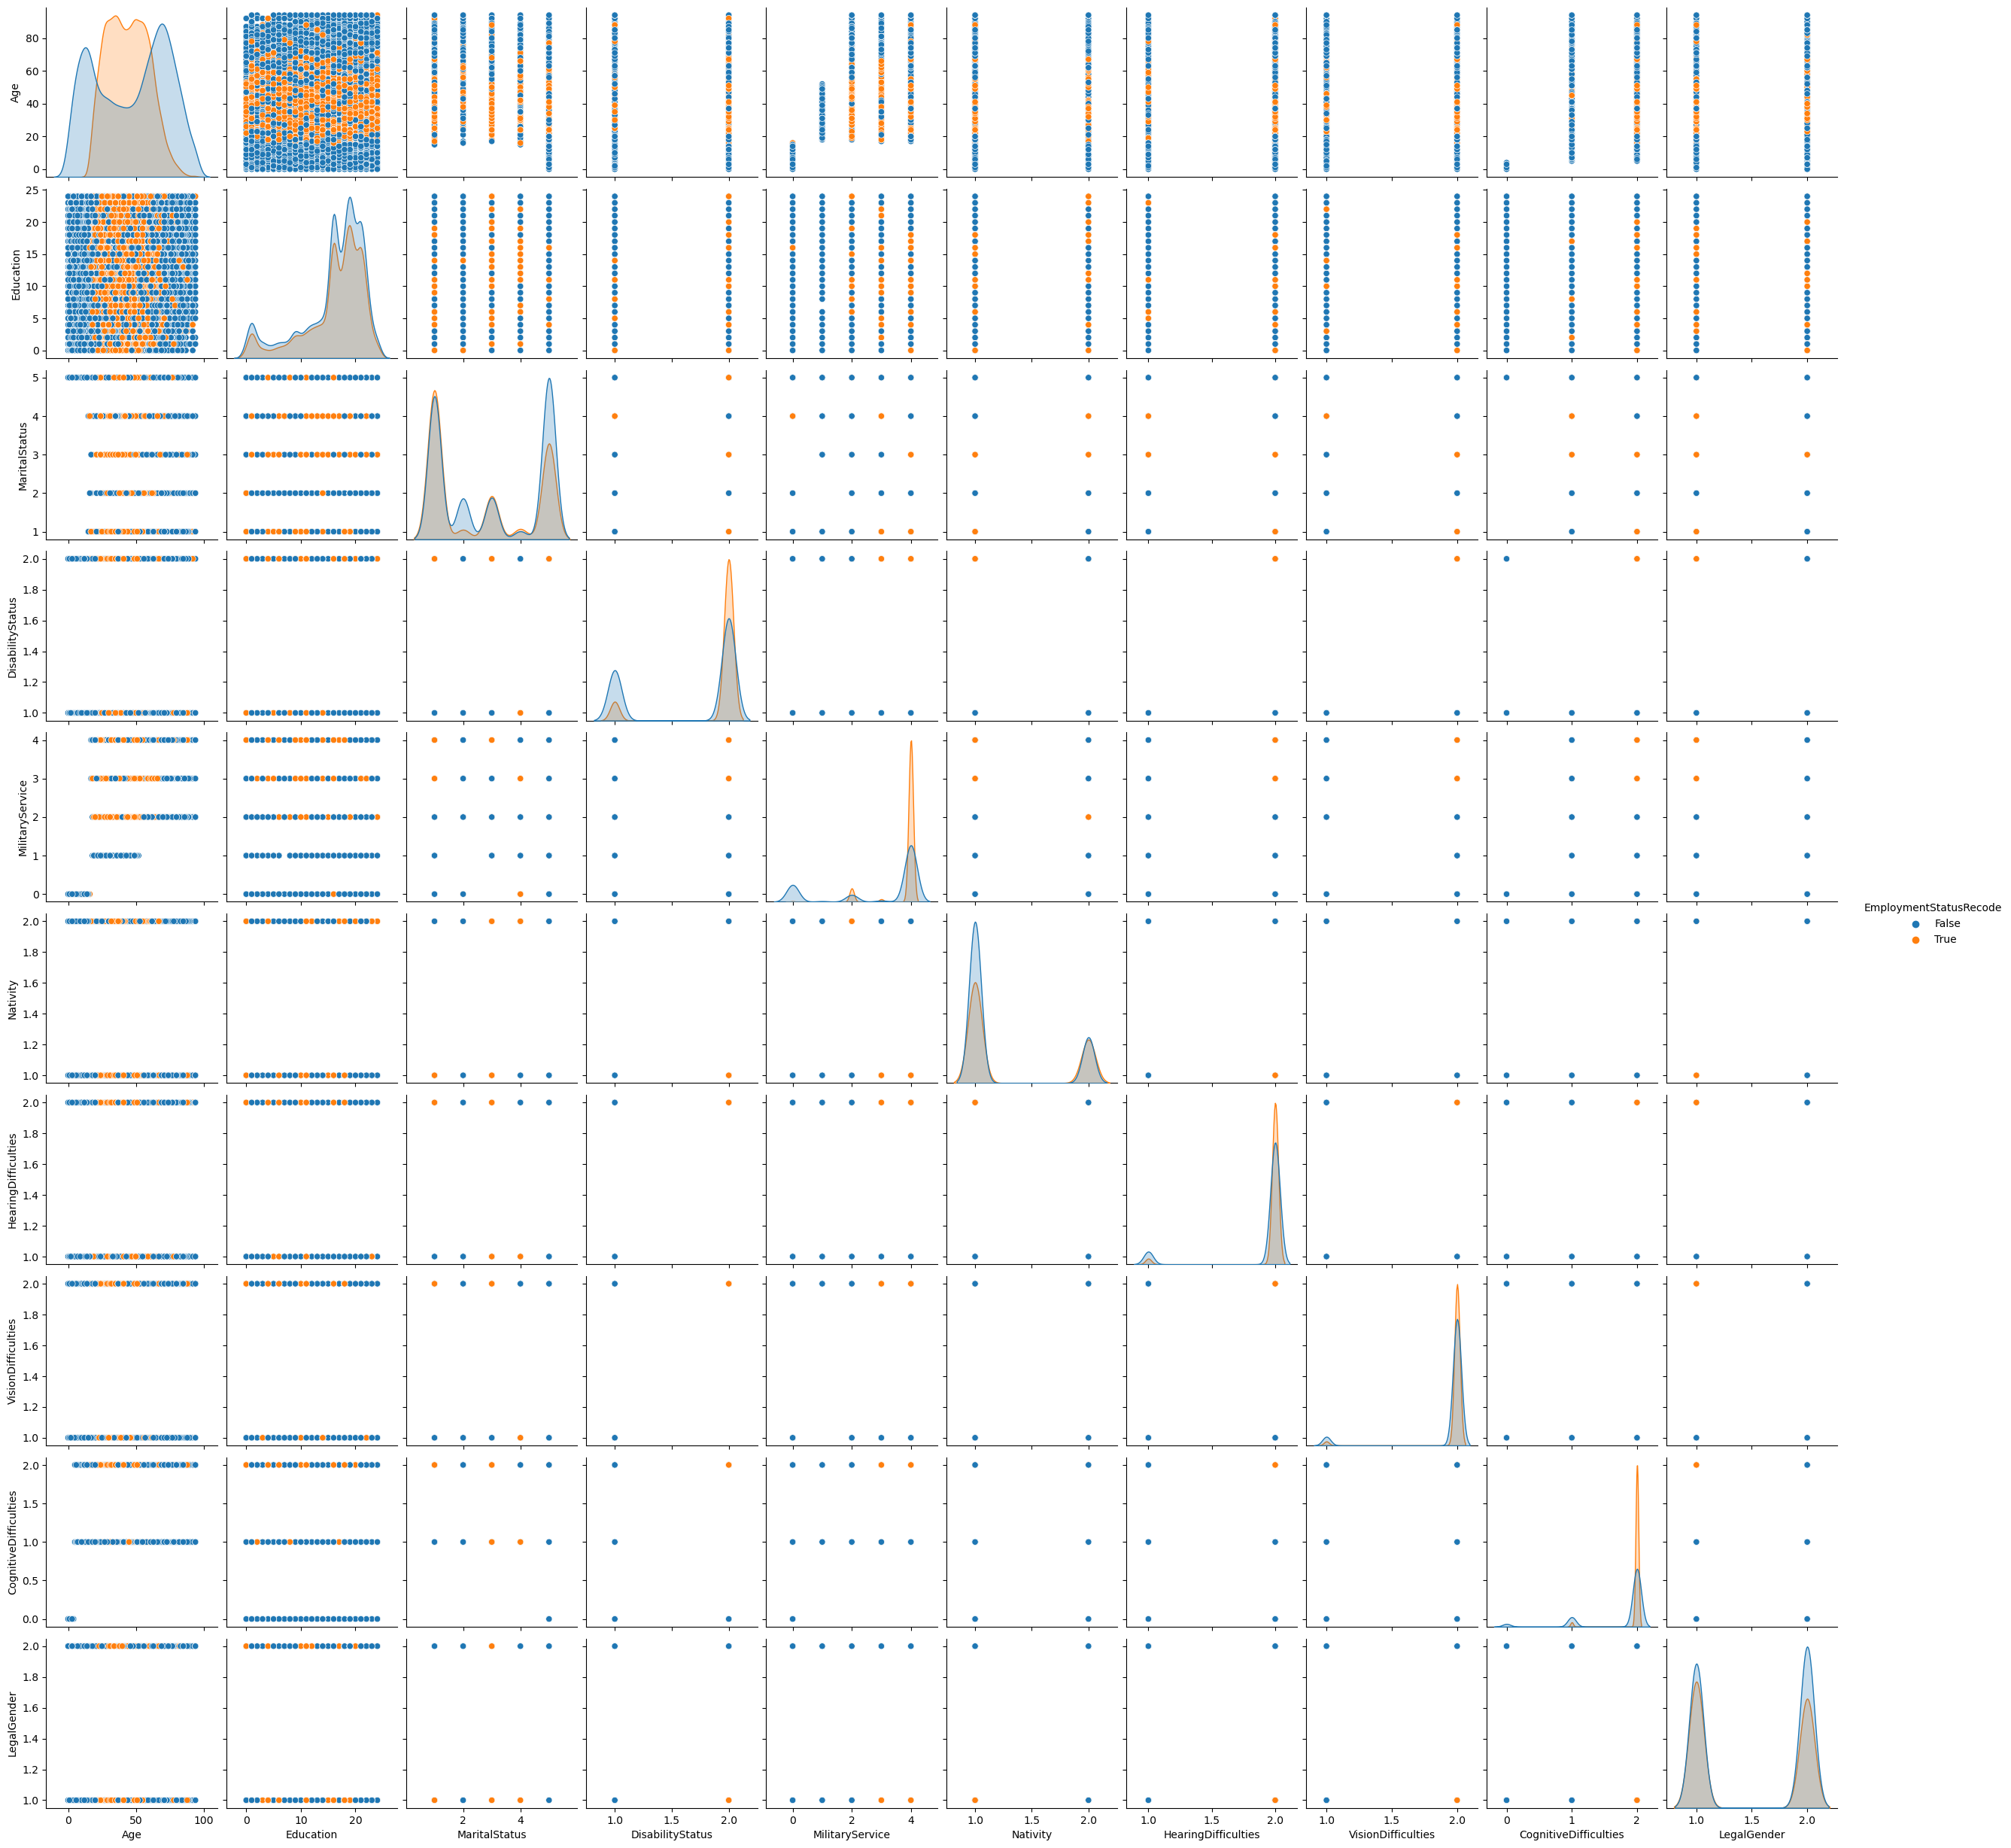

In [27]:
sns.pairplot(df.sample(n=50000), hue='EmploymentStatusRecode')

## Clustering

### Preprocessing

In [28]:
target = df['EmploymentStatusRecode']
df = df.drop(columns=['EmploymentStatusRecode'])

In [66]:
df.head()

,Age,Education,MaritalStatus,DisabilityStatus,MilitaryService,Nativity,HearingDifficulties,VisionDifficulties,CognitiveDifficulties,LegalGender
0,21.0,4.0,5.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0
1,19.0,0.0,5.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0
2,24.0,4.0,5.0,1.0,4.0,1.0,2.0,2.0,1.0,1.0
3,20.0,1.0,5.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0
4,31.0,6.0,5.0,2.0,4.0,1.0,2.0,2.0,2.0,1.0


#### Normalization

In [30]:
scaler = MinMaxScaler()
X1 = scaler.fit_transform(df.values)

### K-Means

In [38]:
column_dictionary

{'AGEP': 'Age',
 'SCHL': 'Education',
 'MAR': 'MaritalStatus',
 'DIS': 'DisabilityStatus',
 'ESP': 'ParentsEmploymentStatus',
 'MIG': 'MigrationStatus',
 'MIL': 'MilitaryService',
 'RELP': 'Relationship',
 'CIT': 'CitizenshipStatus',
 'ANC': 'AncestryRecode',
 'NATIVITY': 'Nativity',
 'DEYE': 'VisionDifficulties',
 'DEAR': 'HearingDifficulties',
 'DREM': 'CognitiveDifficulties',
 'SEX': 'LegalGender',
 'ESR': 'EmploymentStatusRecode'}

In [45]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=300)
kmeans.fit(X1)

KMeans(n_clusters=2, n_init=20)

In [46]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([182043, 181913]))

In [47]:
np.unique(target.values, return_counts=True)

(array([False,  True]), array([201786, 162170]))

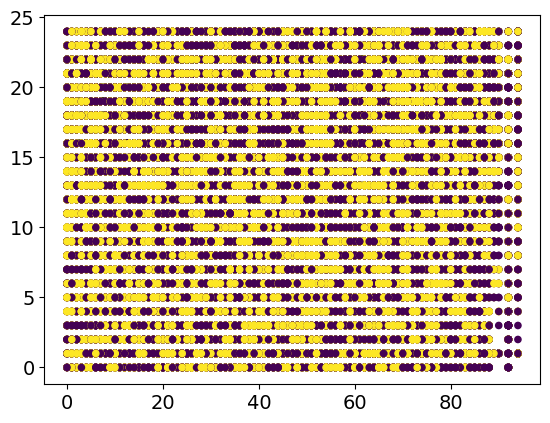

In [48]:
plt.scatter(df['Age'], df['Education'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

#### Select "good" K

Apparently, the K-means method does not reproduce the target variable. K != 2

In [58]:
sse_list = list()
max_k = 30
for k in range(20, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=20, max_iter=300)
    kmeans.fit(X1)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

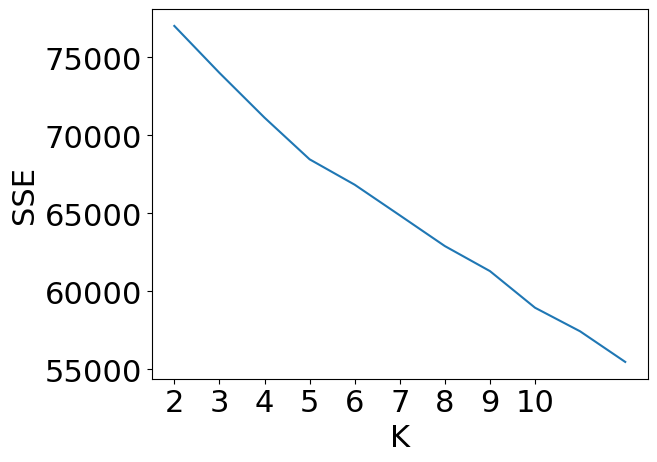

In [59]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks([2,3,4,5,6,7,8,9,10])
plt.show()

Still too high

#### Evaluation - internal

In [49]:
print('SSE %s' % kmeans.inertia_)
#print('Silhouette %s' % metrics.silhouette_score(X1, kmeans.labels_))
print('DB Separation %s' % metrics.davies_bouldin_score(X1, kmeans.labels_))

SSE 341311.8572744796
DB Separation 1.8340237183285453


#### Evaluation - external

In [50]:
#Similarity between assignments
metrics.adjusted_rand_score(target, kmeans.labels_)

0.004209752690414066

In [51]:
#are cluster composed of objects with the same real labels?
metrics.homogeneity_score(target, kmeans.labels_) #homogenity score

0.003100223270824081

In [52]:
#are real labels concentrated in specific clusters?
metrics.completeness_score(target, kmeans.labels_)

0.003073674942046765

In [53]:
#harmonic mean between completeness_score and homogeneity_score
metrics.v_measure_score(target, kmeans.labels_, beta=2) 

0.0030824737197056

### DBSCAN

In [61]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X1)

DBSCAN(eps=0.05)

In [73]:
np.unique(dbscan.labels_, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176

### Hierarchical clustering

method='ward' Ward variance minimization algorithm.
  The new entry $`d(u,v)`$ is computed as follows,
  $$
      d(u,v) = \sqrt{\frac{|v|+|s|}
                          {T}d(v,s)^2
                  + \frac{|v|+|t|}
                          {T}d(v,t)^2
                  - \frac{|v|}
                          {T}d(s,t)^2}
  $$
  where $`u`$ is the newly joined cluster consisting of
  clusters $`s`$ and $`t`$, $`v`$ is an unused
  cluster in the forest, $`T=|v|+|s|+|t|`$, and
  $`|*|`$ is the cardinality of its argument. This is also
  known as the incremental algorithm.

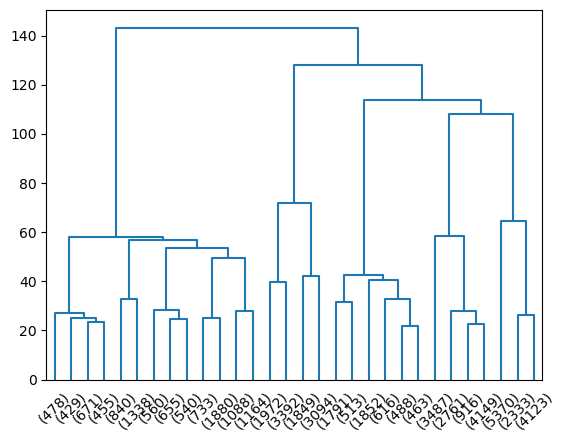

In [69]:
data_dist = pdist(X1, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

## Supervised learning

In [27]:
target = df['EmploymentStatusRecode']
df = df.drop(columns=['EmploymentStatusRecode'])

In [62]:
le = LabelEncoder()
num_classes = le.fit_transform(target)

In [64]:
num_classes

array([1, 0, 0, ..., 0, 0, 0])

### Decision trees

In [65]:
df.columns

Index(['Age', 'Education', 'MaritalStatus', 'DisabilityStatus',
       'MilitaryService', 'Nativity', 'HearingDifficulties',
       'VisionDifficulties', 'CognitiveDifficulties', 'LegalGender'],
      dtype='object')

In [28]:
predictors = [col for col in df.columns]

In [29]:
X = df[predictors].values
y = target

Split dataset into training-set and test-set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

Decision tree parameters:
* **criterion** (default 'gini'): The function to measure the quality of a split. Available: gini, entropy.
* **max_depth** (default None): The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* **min_samples_split** (default 2): The minimum number of samples required to split an internal node.
* **min_samples_leaf** (default 1): The minimum number of samples required to be at a leaf node.

In [31]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
clf

DecisionTreeClassifier()

In [32]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
for col, imp in zip(predictors, clf.feature_importances_):
    print(col, imp)
print(clf.classes_)

Age 0.43445933772901596
Education 0.1347061778987724
MaritalStatus 0.04497215084522919
DisabilityStatus 0.09136556231898557
MilitaryService 0.22607418485511047
Nativity 0.02062728860096567
HearingDifficulties 0.008310438068779697
VisionDifficulties 0.009229817425894302
CognitiveDifficulties 0.00878302044259443
LegalGender 0.02147202181465237
[False  True]


#### Apply on training

In [34]:
y_pred = clf.predict(X_train)

In [35]:
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))

Accuracy 0.8077631108965376
F1-score [0.82055735 0.79300434]


In [36]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.79      0.82    141250
        True       0.76      0.83      0.79    113519

    accuracy                           0.81    254769
   macro avg       0.81      0.81      0.81    254769
weighted avg       0.81      0.81      0.81    254769



In [38]:
confusion_matrix(y_train, y_pred, normalize='all')

array([[0.4395315 , 0.11489231],
       [0.07734457, 0.36823161]])

#### Test

In [39]:
y_pred = clf.predict(X_test)

In [41]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred, normalize='all')

Accuracy 0.7194720983267239
F1-score [0.7373746  0.69895031]
              precision    recall  f1-score   support

       False       0.77      0.71      0.74     60536
        True       0.67      0.73      0.70     48651

    accuracy                           0.72    109187
   macro avg       0.72      0.72      0.72    109187
weighted avg       0.72      0.72      0.72    109187



array([[0.39381978, 0.1606052 ],
       [0.1199227 , 0.32565232]])

In [44]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

[False, True]

In [82]:
y_test

26771     False
111099    False
144120    False
214131    False
28023      True
          ...  
48064     False
76372      True
106788     True
117763     True
179872     True
Name: EmploymentStatusRecode, Length: 109187, dtype: bool

In [83]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred)


In [90]:
by_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [86]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(by_test[i,:], by_pred[i,:])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

/home/iridescent/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/iridescent/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/iridescent/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


0.720589847642996

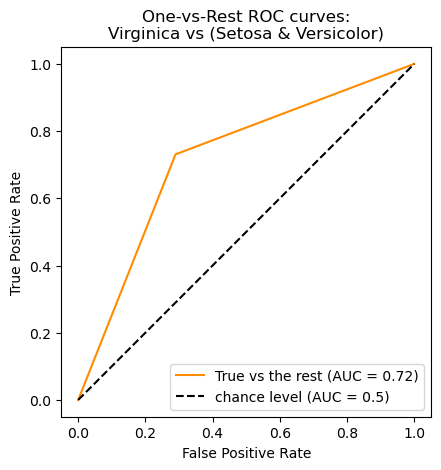

In [92]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

class_of_interest = True
class_id = np.flatnonzero(lb.classes_ == class_of_interest)


RocCurveDisplay.from_predictions(
    y_test, y_pred,
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

In [94]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7212 (+/- 0.00)
F1-score: 0.7199 (+/- 0.00)


In [95]:
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=10)
sorted(scores.keys())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [96]:
scores

{'fit_time': array([0.2264781 , 0.22627139, 0.22594023, 0.22576618, 0.23147392,
        0.22417378, 0.22614408, 0.22694516, 0.22548223, 0.22585917]),
 'score_time': array([0.01202035, 0.01130199, 0.01150465, 0.01140094, 0.01166177,
        0.01163197, 0.01161432, 0.01149774, 0.01124787, 0.01144361]),
 'test_precision_macro': array([0.71872489, 0.7243475 , 0.72189896, 0.71815652, 0.7144983 ,
        0.71775767, 0.7184052 , 0.72135424, 0.71848727, 0.72123904]),
 'test_recall_macro': array([0.72108607, 0.72677059, 0.72424111, 0.72056131, 0.71680559,
        0.71993252, 0.72047701, 0.72372661, 0.72096934, 0.72356767])}

### Random forest

In [98]:
clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             class_weight=None)

In [103]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7314 (+/- 0.00)
F1-score: 0.7309 (+/- 0.00)


In [100]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
y_pred = clf.predict(X_test)

In [102]:
accuracy_score(y_test, y_pred)

0.7296198265361261